In [8]:
import cv2
import numpy as np
import os

# Thư mục chứa ảnh gốc
input_folder = "/media/pphong/New Volume/ML & DL/ML/pred_mango/image_origin/ngot"
# Thư mục lưu ảnh sau khi tách nền
output_folder = "/media/pphong/New Volume/ML & DL/ML/pred_mango/image_tachnen/ngot"
os.makedirs(output_folder, exist_ok=True)

for fname in os.listdir(input_folder):
    if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    path = os.path.join(input_folder, fname)
    img = cv2.imread(path)
    if img is None:
        continue

    # Tạo mask cho nền trắng (gần trắng)
    lower = np.array([200, 200, 200], dtype=np.uint8)  # ngưỡng dưới
    upper = np.array([255, 255, 255], dtype=np.uint8)  # ngưỡng trên
    mask = cv2.inRange(img, lower, upper)

    # Đảo mask để giữ vật thể
    mask_inv = cv2.bitwise_not(mask)

    # Áp mask vào ảnh gốc → nền = đen
    result = cv2.bitwise_and(img, img, mask=mask_inv)

    # Lưu ảnh kết quả
    save_path = os.path.join(output_folder, fname)
    cv2.imwrite(save_path, result)

print("Đã tách nền trắng thành đen, ảnh lưu trong:", output_folder)


Đã tách nền trắng thành đen, ảnh lưu trong: /media/pphong/New Volume/ML & DL/ML/pred_mango/image_tachnen/ngot


/tmp/ipykernel_5074/252907375.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_np = np.array(img)                        # Chuyển ảnh sang mảng numpy


Ngưỡng phân loại (lambda): 178.72222986906507


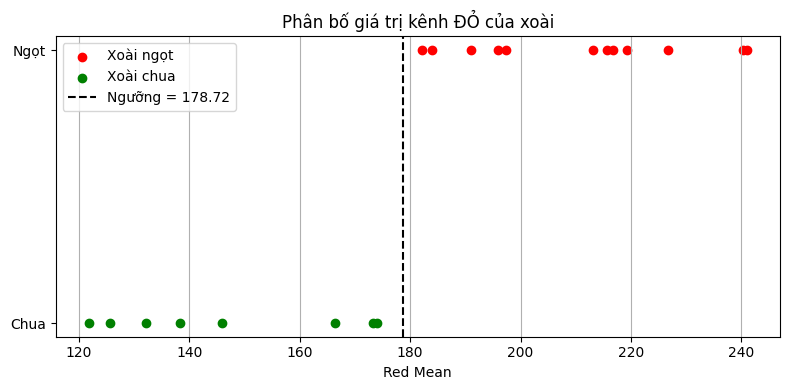

In [12]:
from PIL import Image          # Thư viện để xử lý ảnh (đọc, convert RGB)
import numpy as np             # Thư viện xử lý ma trận, số liệu
import matplotlib.pyplot as plt # Thư viện vẽ biểu đồ
import os                      # Thư viện thao tác với file & folder

# Đường dẫn dataset (ảnh xoài đã tách nền)
base_dir = "/media/pphong/New Volume/ML & DL/ML/pred_mango/image_tachnen"

# Lưu giá trị trung bình kênh đỏ theo nhãn
red_means = {"ngot": [], "chua": []}

# === TÍNH MEAN CHO TỪNG ẢNH ===
for label in ["ngot", "chua"]:                        # Duyệt qua 2 thư mục: ngot và chua
    folder_path = os.path.join(base_dir, label)       # Tạo đường dẫn đến thư mục
    for fname in os.listdir(folder_path):             # Duyệt qua từng file trong thư mục
        if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue                                  # Nếu không phải ảnh thì bỏ qua

        # Đọc ảnh và chuyển sang RGB
        img = Image.open(os.path.join(folder_path, fname)).convert("RGB")
        img_np = np.array(img)                        # Chuyển ảnh sang mảng numpy

        # Tạo mask: bỏ nền đen (pixel khác [0,0,0] sẽ được giữ lại)
        mask = np.any(img_np > [0,0,0], axis=-1)

        # Lấy tất cả giá trị kênh ĐỎ của vùng mask (vùng có xoài)
        red_values = img_np[:,:,0][mask]

        if red_values.size > 0:                       # Nếu có dữ liệu
            red_mean = np.mean(red_values)            # Tính trung bình kênh đỏ
            red_means[label].append(red_mean)         # Lưu vào list của nhãn đó (ngot/chua)

# === TÍNH NGƯỠNG ===
mean_ngot = np.mean(red_means["ngot"])                # Trung bình red_mean xoài ngọt
mean_chua = np.mean(red_means["chua"])                # Trung bình red_mean xoài chua
lamda = (mean_ngot + mean_chua) / 2                   # Ngưỡng = trung bình 2 lớp

print("Ngưỡng phân loại (lambda):", lamda)            # In ra ngưỡng

# === VẼ BIỂU ĐỒ ===
plt.figure(figsize=(8,4))                             # Tạo figure kích thước 8x4

# Vẽ scatter: xoài ngọt (y=1, màu đỏ)
plt.scatter(red_means["ngot"], [1]*len(red_means["ngot"]),
            color="red", label="Xoài ngọt")

# Vẽ scatter: xoài chua (y=0, màu xanh)
plt.scatter(red_means["chua"], [0]*len(red_means["chua"]),
            color="green", label="Xoài chua")

# Vẽ đường thẳng đứng tại vị trí ngưỡng λ
plt.axvline(x=lamda, color='black', linestyle='--', label=f'Ngưỡng = {lamda:.2f}')

# Tùy chỉnh trục và hiển thị
plt.yticks([0,1], ["Chua","Ngọt"])                   # Gắn nhãn cho trục Y
plt.xlabel("Red Mean")                               # Nhãn trục X
plt.title("Phân bố giá trị kênh ĐỎ của xoài")        # Tiêu đề biểu đồ
plt.legend()                                         # Hiển thị chú thích
plt.grid(True, axis="x")                             # Bật grid theo trục X
plt.tight_layout()                                   # Canh layout cho đẹp
plt.show()                                           # Hiển thị biểu đồ


/tmp/ipykernel_5074/389865936.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_np = np.array(img)                                           # Đưa về numpy array


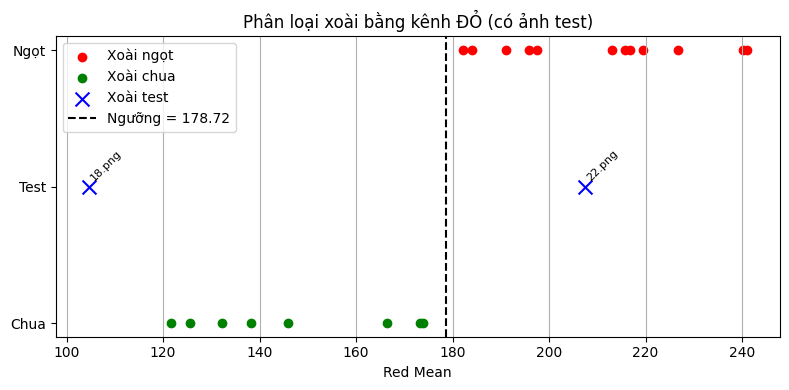

18.png: Red Mean = 104.55 -> Dự đoán = chua
22.png: Red Mean = 207.52 -> Dự đoán = ngot


In [13]:
# === TEST ẢNH CHƯA GÁN NHÃN ===
test_dir = "/media/pphong/New Volume/ML & DL/ML/pred_mango/image_test"  
# Đường dẫn thư mục chứa ảnh test (chưa gán nhãn)

test_red_means = []   # Lưu giá trị red mean của ảnh test
test_labels = []      # Lưu kết quả phân loại (ngot/chua)
test_files = []       # Lưu tên file test

for fname in os.listdir(test_dir):                       # Duyệt qua từng file trong thư mục test
    if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue                                         # Nếu không phải ảnh thì bỏ qua
    
    # Đọc ảnh test
    img = Image.open(os.path.join(test_dir, fname)).convert("RGB")  # Mở ảnh & chuyển sang RGB
    img_np = np.array(img)                                           # Đưa về numpy array

    # Bỏ nền đen
    mask = np.any(img_np > [0,0,0], axis=-1)              # Giữ lại pixel khác [0,0,0]
    red_values = img_np[:,:,0][mask]                      # Lấy toàn bộ giá trị kênh đỏ trong vùng xoài

    if red_values.size > 0:                               # Nếu có pixel xoài
        rmean = np.mean(red_values)                       # Tính trung bình kênh đỏ
        test_red_means.append(rmean)                      # Lưu giá trị red mean
        test_files.append(fname)                          # Lưu tên file

        # So sánh với ngưỡng để phân loại
        if rmean >= lamda:                                # Nếu red_mean lớn hơn ngưỡng
            test_labels.append("ngot")                    # Dự đoán xoài ngọt
        else:
            test_labels.append("chua")                    # Ngược lại → xoài chua

# === VẼ BIỂU ĐỒ CÙNG VỚI TEST ===
plt.figure(figsize=(8,4))                                 # Tạo figure 8x4

# Dữ liệu training
plt.scatter(red_means["ngot"], [1]*len(red_means["ngot"]),  # Vẽ xoài ngọt (y=1, chấm đỏ)
            color="red", label="Xoài ngọt")
plt.scatter(red_means["chua"], [0]*len(red_means["chua"]),  # Vẽ xoài chua (y=0, chấm xanh)
            color="green", label="Xoài chua")

# Dữ liệu test (hiện ở giữa trục y=0.5)
for i, rmean in enumerate(test_red_means):                # Duyệt qua từng ảnh test
    plt.scatter(rmean, 0.5, color="blue", marker="x", s=100, # Vẽ dấu X xanh dương ở y=0.5
                label="Xoài test" if i==0 else "")           # Đặt label 1 lần cho legend
    plt.text(rmean, 0.52, test_files[i], fontsize=8, rotation=45)  # Ghi tên file cạnh điểm test

# Vẽ ngưỡng λ
plt.axvline(x=lamda, color='black', linestyle='--', label=f'Ngưỡng = {lamda:.2f}')  
# Vẽ đường thẳng đứng chia ngọt/chua

# Tùy chỉnh trục
plt.yticks([0,0.5,1], ["Chua","Test","Ngọt"])             # Đặt nhãn cho trục Y
plt.xlabel("Red Mean")                                    # Nhãn trục X
plt.title("Phân loại xoài bằng kênh ĐỎ (có ảnh test)")    # Tiêu đề biểu đồ
plt.legend()                                              # Hiển thị chú thích
plt.grid(True, axis="x")                                  # Bật lưới theo trục X
plt.tight_layout()                                        # Canh layout gọn gàng
plt.show()                                                # Hiển thị biểu đồ

# In kết quả phân loại test
for fname, rmean, label in zip(test_files, test_red_means, test_labels):
    print(f"{fname}: Red Mean = {rmean:.2f} -> Dự đoán = {label}")
# In ra: tên file, giá trị Red Mean, và dự đoán ngọt/chua
